In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [43]:
iris=datasets.load_iris()

In [44]:
df=pd.DataFrame(iris.data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
df['Category']=iris.target

In [45]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Category        0
dtype: int64

In [47]:
unique=df['Category'].unique()
print(unique)

[0 1 2]


In [48]:
df['Category']=df['Category'].replace({0:"setosa",1:"versicolor",2:"virginica"})

In [49]:
df['Category']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Category, Length: 150, dtype: object

**Categorical and Numerical datatypes**

In [50]:
numericColumns=df.select_dtypes(include='number').columns
numericColumns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], dtype='object')

In [51]:
categoricalColumns=df.select_dtypes(include='category').columns
categoricalColumns

Index([], dtype='object')

**Historgram for all columns**

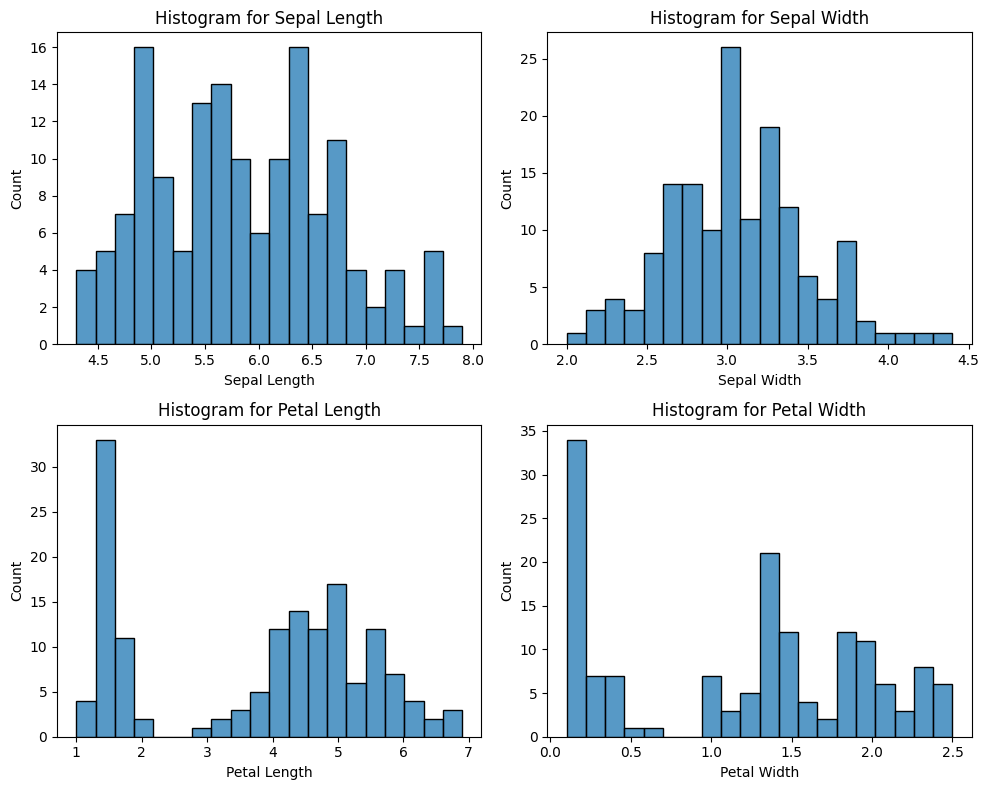

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df['Sepal Length'], bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Histogram for Sepal Length')

sns.histplot(df['Sepal Width'], bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Histogram for Sepal Width')

sns.histplot(df['Petal Length'], bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Histogram for Petal Length')

sns.histplot(df['Petal Width'], bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Histogram for Petal Width')
plt.tight_layout()

**Boxplot**

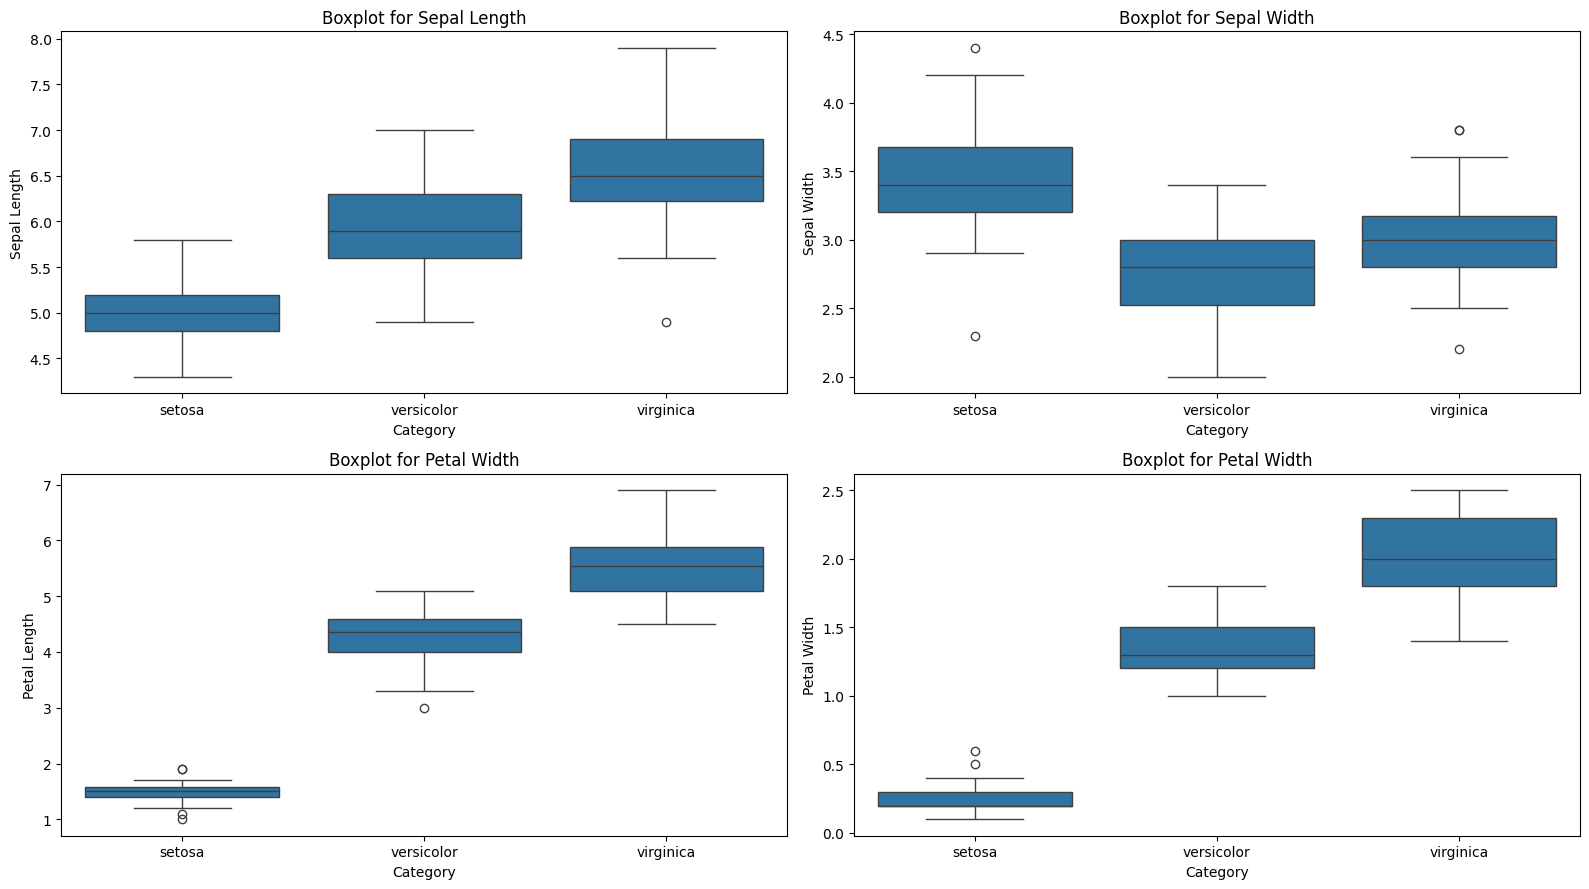

In [53]:
fig,axes=plt.subplots(2,2,figsize=(16,9))
sns.boxplot(y='Sepal Length',x='Category',data=df,ax=axes[0,0])
axes[0, 0].set_title('Boxplot for Sepal Length')

sns.boxplot(y='Sepal Width',x='Category',data=df,ax=axes[0,1])
axes[0, 1].set_title('Boxplot for Sepal Width')

sns.boxplot(y='Petal Length',x='Category',data=df,ax=axes[1,0])
axes[1, 0].set_title('Boxplot for Petal Width')

sns.boxplot(y='Petal Width',x='Category',data=df,ax=axes[1,1])
axes[1, 1].set_title('Boxplot for Petal Width')
plt.tight_layout()

**Removing Outliers**

In [54]:
lowerlimit = df['Sepal Width'] > 2.5
upperlimit = df['Sepal Width'] < 3.5
df = df[(lowerlimit) & (upperlimit)]

<Axes: xlabel='Category', ylabel='Sepal Width'>

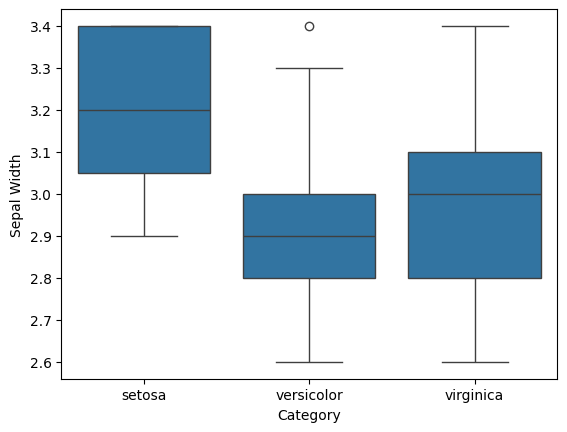

In [55]:
sns.boxplot(data = df, x = 'Category', y = 'Sepal Width')

In [56]:
def iqr(col : pd.core.series.Series) :
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lowerLimit = Q1 - 1.5 * IQR
  upperLimit = Q3 + 1.5 * IQR

  newCol = col[ (col < upperLimit) & (col > lowerLimit) ]
  return newCol

<Axes: xlabel='Petal Length'>

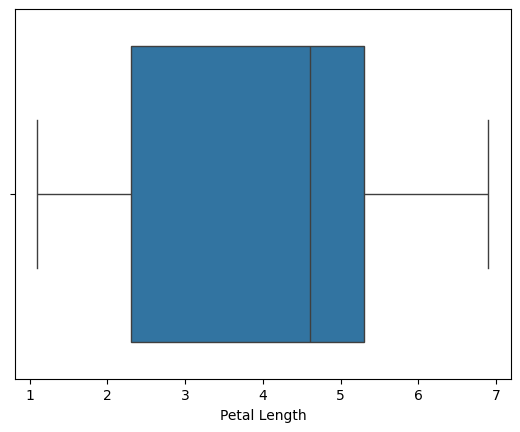

In [58]:
petallength=iqr(df['Petal Length'])
sns.boxplot(data=df,x=petallength)


Scatterplot for Combinations

Text(0.5, 1.0, 'Petal Length vs Petal Width')

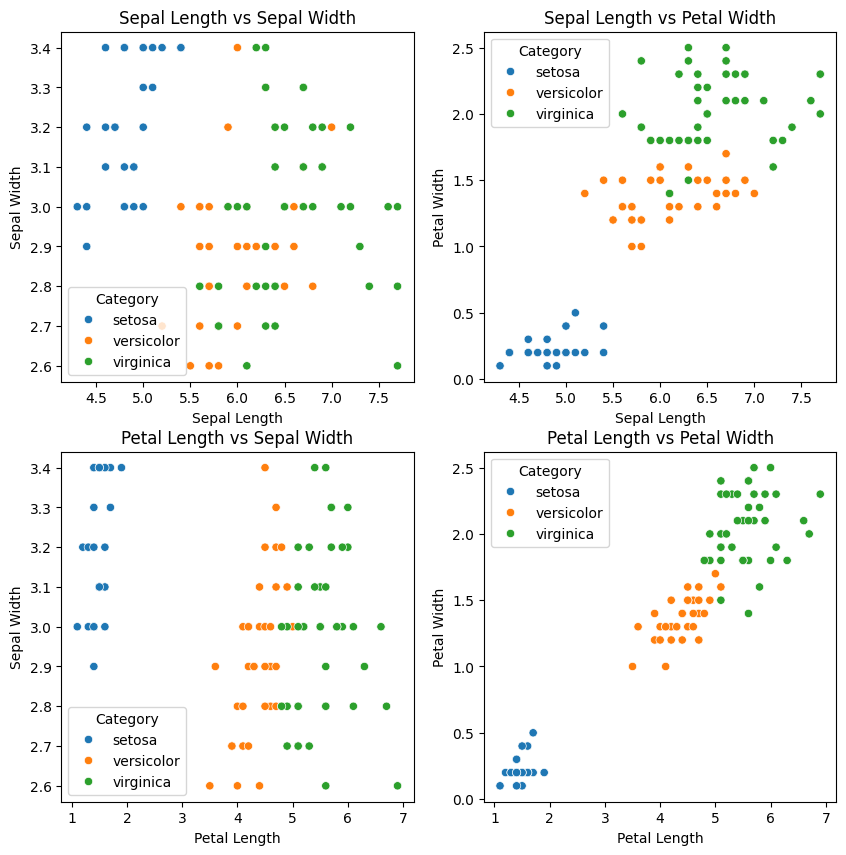

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot Sepal Length vs Sepal Width
sns.scatterplot(data=df, x='Sepal Length', y='Sepal Width', hue='Category', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length vs Sepal Width')

# Plot Sepal Length vs Petal Width
sns.scatterplot(data=df, x='Sepal Length', y='Petal Width', hue='Category', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Length vs Petal Width')

# Plot Petal Length vs Sepal Width
sns.scatterplot(data=df, x='Petal Length', y='Sepal Width', hue='Category', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length vs Sepal Width')

# Plot Petal Length vs Petal Width
sns.scatterplot(data=df, x='Petal Length', y='Petal Width', hue='Category', ax=axs[1, 1])
axs[1, 1].set_title('Petal Length vs Petal Width')

# Show the plot